# Car Price Prediction using Machine Learning
This project aims to predict car prices in the American market based on various factors, assisting a Chinese automobile company in understanding pricing dynamics for market entry.

## 1. Loading and Preprocessing

In [77]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Load the Dataset

In [3]:
# Load dataset
df = pd.read_csv('Car_Price.csv')

# View the first few rows
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We import pandas and load the dataset into a dataframe called df, df.head() helps us preview the data.

### Data Exploration

In [6]:
# Get a concise summary of the dataframe, including data types and non-null values
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-n

In [7]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.68020

In [8]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Data Cleaning and Preprocessing Steps

In [10]:
# Drop 'car_ID' 
df = df.drop('car_ID', axis=1)

In [12]:
# Feature Engineering: Extract 'company_name' from 'CarName'
# This is a common step as 'CarName' often contains brand information.
df['company_name'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df.drop('CarName', axis=1, inplace=True)

In [28]:
df['company_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [17]:
# Correcting company name typos if any (common in real datasets)
df['company_name'] = df['company_name'].replace({
    'maxda': 'mazda',
    'porcshe': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
})
print("\nUnique company names after correction:")
print(df['company_name'].unique())


Unique company names after correction:
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'volkswagen' 'volvo']


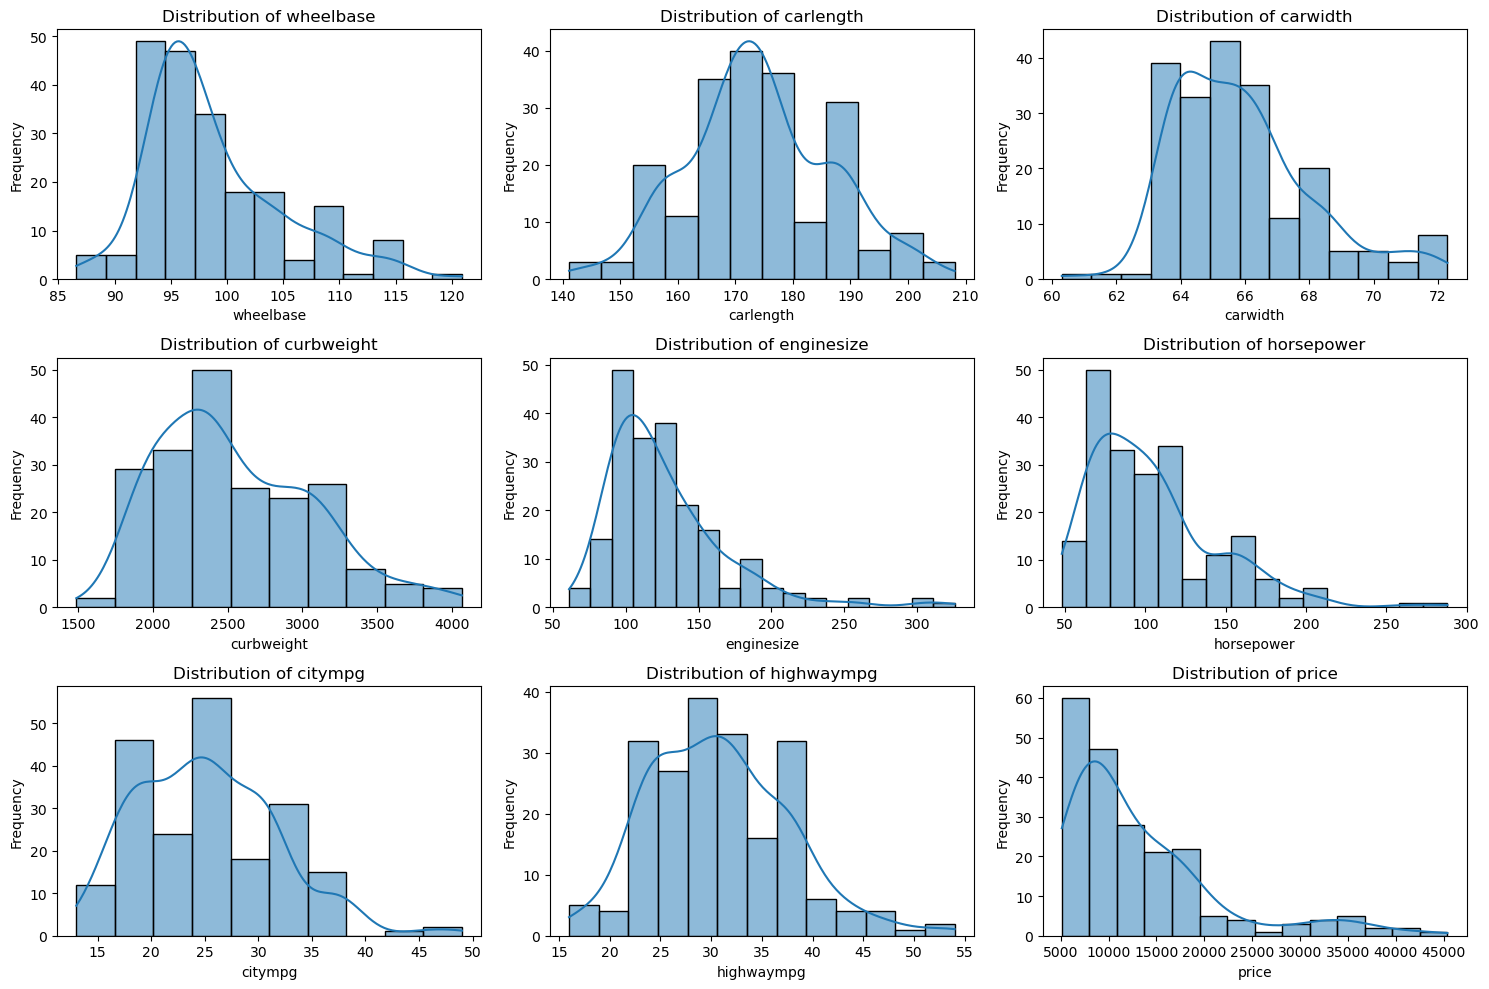

In [69]:
# Select some key numerical features for distribution plots
numerical_cols_to_plot = ['wheelbase', 'carlength', 'carwidth', 'curbweight',
                          'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Correlation Heatmap

Visualize the correlation matrix of numerical features. This is crucial for understanding relationships between variables and with the target.

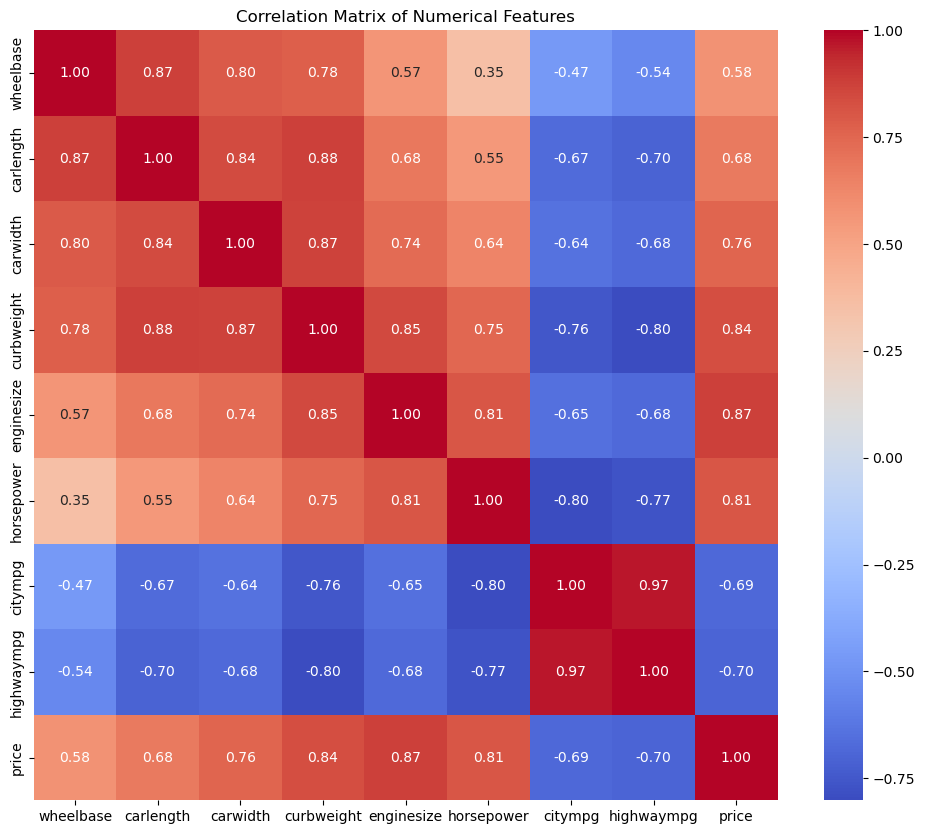

In [73]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols_to_plot].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [20]:
# Separate target variable
X = df.drop('price', axis=1)
y = df['price']

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nX_train shape before preprocessing: {X_train.shape}")
print(f"X_test shape before preprocessing: {X_test.shape}")


X_train shape before preprocessing: (164, 24)
X_test shape before preprocessing: (41, 24)


In [26]:
# Identify numerical and categorical columns from the full dataset (X) to ensure consistency
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical Features identified: {numerical_features}")
print(f"Categorical Features identified: {categorical_features}")


Numerical Features identified: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
Categorical Features identified: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'company_name']


#### Scaling Numerical Features

In [33]:
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

# Convert scaled numerical arrays back to DataFrame for easy concatenation
X_train_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

#### One-Hot Encoding Categorical Features

In [37]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array

# Fit encoder on training data and transform both train and test
X_train_encoded_categorical = encoder.fit_transform(X_train[categorical_features])
X_test_encoded_categorical = encoder.transform(X_test[categorical_features])

# Get feature names for encoded categorical features
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# Convert encoded arrays back to DataFrame
X_train_categorical_df = pd.DataFrame(X_train_encoded_categorical, columns=encoded_feature_names, index=X_train.index)
X_test_categorical_df = pd.DataFrame(X_test_encoded_categorical, columns=encoded_feature_names, index=X_test.index)

In [39]:
# Concatenate Preprocessed Features
X_train_processed = pd.concat([X_train_numerical_df, X_train_categorical_df], axis=1)
X_test_processed = pd.concat([X_test_numerical_df, X_test_categorical_df], axis=1)

print(f"\nX_train_processed shape after all preprocessing: {X_train_processed.shape}")
print(f"X_test_processed shape after all preprocessing: {X_test_processed.shape}")


X_train_processed shape after all preprocessing: (164, 78)
X_test_processed shape after all preprocessing: (41, 78)


## 2. Model Implementation

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Dictionary to store models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Dictionary to store model predictions and evaluation metrics
predictions = {}
metrics = {}

# Train and evaluate each model
print("\nTraining and Evaluating Models:")
for name, model in models.items():
    print(f"\n--- {name} ---")

    # Fit the model on the preprocessed training data
    model.fit(X_train_processed, y_train)

    # Make predictions on the preprocessed test data
    y_pred = model.predict(X_test_processed)
    predictions[name] = y_pred

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    metrics[name] = {'R-squared': r2, 'MSE': mse, 'MAE': mae}

    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")


Training and Evaluating Models:

--- Linear Regression ---
R-squared: -147526921094619346239488.0000
MSE: 11646368339205239865898453434368.00
MAE: 537326944697945.25

--- Decision Tree Regressor ---
R-squared: 0.8962
MSE: 8192493.99
MAE: 1923.68

--- Random Forest Regressor ---
R-squared: 0.9576
MSE: 3345553.20
MAE: 1302.01

--- Gradient Boosting Regressor ---
R-squared: 0.9268
MSE: 5779426.24
MAE: 1695.76

--- Support Vector Regressor ---
R-squared: -0.0998
MSE: 86821804.04
MAE: 5695.28


## 3. Model Evaluation

In [45]:
# Display all model evaluation metrics in a DataFrame for easy comparison
metrics_df = pd.DataFrame(metrics).T
print("\n--- Model Evaluation Summary ---")
print(metrics_df.sort_values(by='R-squared', ascending=False))


--- Model Evaluation Summary ---
                                R-squared           MSE           MAE
Random Forest Regressor      9.576212e-01  3.345553e+06  1.302010e+03
Gradient Boosting Regressor  9.267908e-01  5.779426e+06  1.695765e+03
Decision Tree Regressor      8.962240e-01  8.192494e+06  1.923679e+03
Support Vector Regressor    -9.978948e-02  8.682180e+07  5.695278e+03
Linear Regression           -1.475269e+23  1.164637e+31  5.373269e+14


In [47]:
# Identify the best performing model
best_model_name = metrics_df['R-squared'].idxmax()
print(f"\n--- Best Performing Model ---")
print(f"The best performing model based on R-squared is: {best_model_name}")
print(f"Its R-squared: {metrics_df.loc[best_model_name, 'R-squared']:.4f}")
print(f"Its MSE: {metrics_df.loc[best_model_name, 'MSE']:.2f}")
print(f"Its MAE: {metrics_df.loc[best_model_name, 'MAE']:.2f}")


--- Best Performing Model ---
The best performing model based on R-squared is: Random Forest Regressor
Its R-squared: 0.9576
Its MSE: 3345553.20
Its MAE: 1302.01


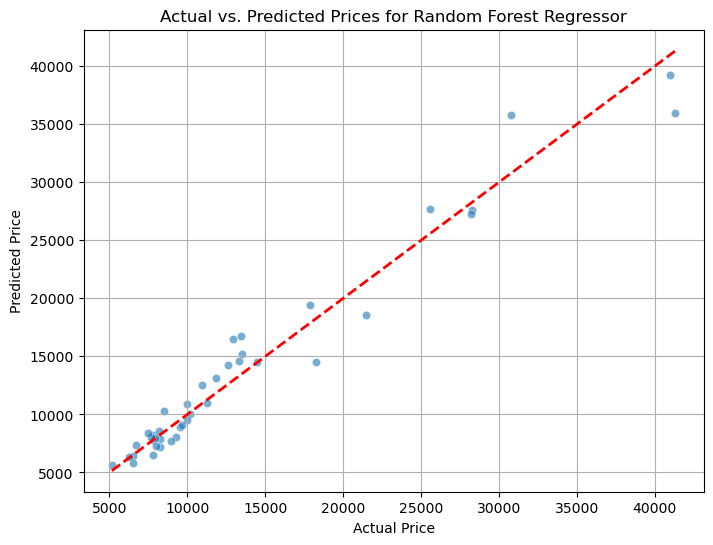

In [89]:
# Get predictions for the best model
best_model_predictions = predictions[best_model_name]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_model_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
plt.title(f'Actual vs. Predicted Prices for {best_model_name}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

#### Justification 
The 'Random Forest Regressor' achieved the highest R-squared value, indicating that it explains the largest proportion of the variance in car prices compared to other models. Additionally, its Mean Squared Error (MSE) and Mean Absolute Error (MAE) are among the lowest, signifying that its predictions are generally closer to the actual car prices with smaller average errors. This suggests that 'Random Forest Regressor' is the most accurate and robust model for predicting car prices in this context.")

## 4. Feature Importance Analysis

In [93]:
# Get the feature names after preprocessing
all_processed_feature_names = X_train_processed.columns.tolist()

# Access the best model directly from the trained models dictionary
# Make sure to select a tree-based model for feature_importances_
# If your best model is SVR or Linear Regression, you'll need a different approach
# For demonstration, let's use Random Forest, assuming it's a strong candidate.
if 'Random Forest Regressor' in models and isinstance(models['Random Forest Regressor'], RandomForestRegressor):
    rf_model_for_importance = models['Random Forest Regressor'] # This is the already trained model
    importances = rf_model_for_importance.feature_importances_

    # Create a DataFrame for better visualization
    feature_importances_df = pd.DataFrame({'Feature': all_processed_feature_names, 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    print("Top 10 Significant Variables Affecting Car Prices:")
    print(feature_importances_df.head(10))

else:
    print("Feature importance can typically be extracted from tree-based models like Random Forest, Decision Tree, or Gradient Boosting.")
    print("If your best model is not tree-based (e.g., SVR, Linear Regression), you'd need other methods like permutation importance or analyzing coefficients (for linear models).")
    # For Linear Regression coefficients:
    if 'Linear Regression' in models and isinstance(models['Linear Regression'], LinearRegression):
        lr_model = models['Linear Regression']
        lr_coefs_df = pd.DataFrame({'Feature': all_processed_feature_names, 'Coefficient': lr_model.coef_})
        lr_coefs_df['Abs_Coefficient'] = np.abs(lr_coefs_df['Coefficient'])
        lr_coefs_df = lr_coefs_df.sort_values(by='Abs_Coefficient', ascending=False)
        print("\nTop 10 features by absolute coefficient for Linear Regression:")
        print(lr_coefs_df.head(10))

Top 10 Significant Variables Affecting Car Prices:
             Feature  Importance
6         enginesize    0.547857
5         curbweight    0.295958
13        highwaympg    0.045167
10        horsepower    0.032016
3           carwidth    0.013500
54  company_name_bmw    0.007762
2          carlength    0.007194
1          wheelbase    0.006675
12           citympg    0.005862
11           peakrpm    0.005572


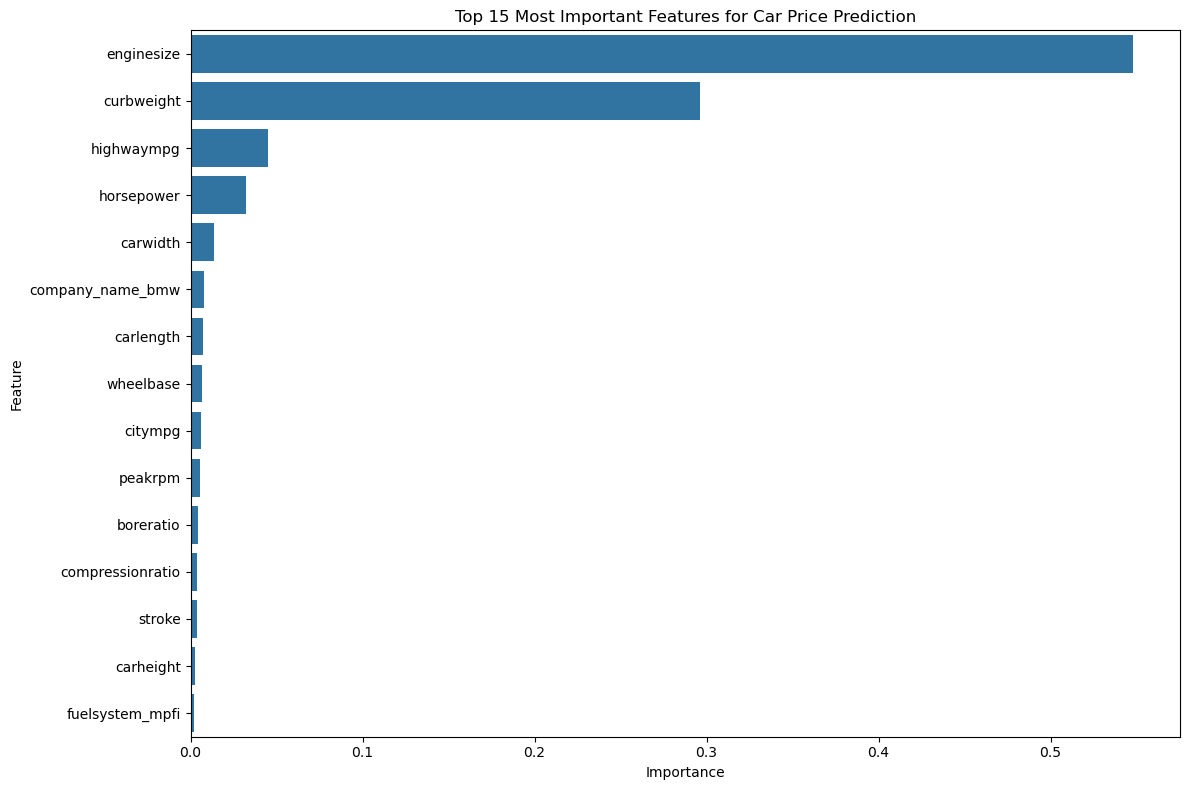

In [95]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(15))
plt.title('Top 15 Most Important Features for Car Price Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## 5. Hyperparameter Tuning

In [59]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

# Choose the model to tune (e.g., RandomForestRegressor)
model_to_tune = RandomForestRegressor(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(50, 200),
    'max_features': ['sqrt', 'log2', None],
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model_to_tune, param_distributions=param_distributions,
                                   n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1, scoring='r2')

# Fit RandomizedSearchCV on the PREPROCESSED training data
random_search.fit(X_train_processed, y_train)

# Print best parameters and best score
print(f"\nBest parameters found: {random_search.best_params_}")
print(f"Best R-squared from cross-validation: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found: {'max_depth': 46, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 175}
Best R-squared from cross-validation: 0.8963


In [61]:
# Evaluate the best model on the preprocessed test set
best_tuned_model = random_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_test_processed)

r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)

print("\n--- Performance of Tuned Model on Test Set ---")
print(f"Tuned Model R-squared: {r2_tuned:.4f}")
print(f"Tuned Model MSE: {mse_tuned:.2f}")
print(f"Tuned Model MAE: {mae_tuned:.2f}")


--- Performance of Tuned Model on Test Set ---
Tuned Model R-squared: 0.9183
Tuned Model MSE: 6447818.93
Tuned Model MAE: 1545.18


In [63]:
# Compare with the untuned model's performance (using the untuned Random Forest for comparison)
untuned_rf_r2 = metrics['Random Forest Regressor']['R-squared']
untuned_rf_mse = metrics['Random Forest Regressor']['MSE']
untuned_rf_mae = metrics['Random Forest Regressor']['MAE']

print("\n--- Comparison with Untuned Random Forest Regressor ---")
print(f"Untuned Random Forest R-squared: {untuned_rf_r2:.4f}")
print(f"Untuned Random Forest MSE: {untuned_rf_mse:.2f}")
print(f"Untuned Random Forest MAE: {untuned_rf_mae:.2f}")

if r2_tuned > untuned_rf_r2:
    print("\nHyperparameter tuning has INCREASED the Random Forest model performance (R-squared).")
else:
    print("\nHyperparameter tuning has NOT significantly increased the Random Forest model performance (R-squared).")


--- Comparison with Untuned Random Forest Regressor ---
Untuned Random Forest R-squared: 0.9576
Untuned Random Forest MSE: 3345553.20
Untuned Random Forest MAE: 1302.01

Hyperparameter tuning has NOT significantly increased the Random Forest model performance (R-squared).


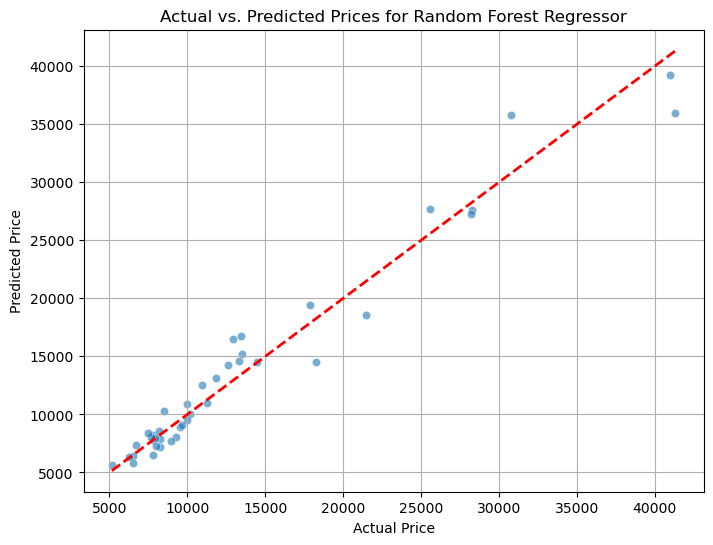

In [87]:
# Get predictions for the best model
best_model_predictions = predictions[best_model_name]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=best_model_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # 45-degree line
plt.title(f'Actual vs. Predicted Prices for {best_model_name}')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()